In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df_test = pd.read_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/data_final_predictions.xlsx')

In [17]:
df_test.head()

,Unnamed: 0,datetime,clouds,ghi,pres,slp,solar_rad,temp,uv,energy_total,...,temp_lag_20,uv_lag_20,clouds_lag_30,ghi_lag_30,pres_lag_30,solar_rad_lag_30,temp_lag_30,uv_lag_30,energy_total_xgb,energy_total_rf
0,8759,2024-08-16 15:00:00,-0.831510,0.356141,-0.072162,-0.059652,0.951746,1.202173,0.327855,1248.84,...,1.210170,-0.757002,0.514769,-1.174573,-0.071371,-0.767673,1.212871,-0.345526,1383.617920,1397.107122
1,8760,2024-08-16 16:00:00,-0.493571,-0.170731,-0.072162,-0.059652,0.260301,1.456584,-0.147428,801.32,...,0.985460,-0.825274,0.854830,0.472603,-0.071371,-0.654135,0.868477,-0.414028,1108.773560,1042.118437
2,8761,2024-08-16 17:00:00,-0.647180,-0.720346,-0.072162,-0.059652,-0.280626,1.366792,-0.215326,635.96,...,1.359977,-0.279101,0.854830,0.901475,-0.071371,-0.474365,1.078108,-0.208523,796.293762,772.793374
3,8762,2024-08-16 18:00:00,-0.309241,-1.224476,-0.072162,-0.059652,-0.854479,0.783143,-0.283224,362.68,...,1.509784,0.608429,0.854830,1.208897,-0.071371,-0.422326,1.302713,0.133986,460.359192,508.207677
4,8763,2024-08-17 08:00:00,0.182306,0.424369,0.019930,0.032155,0.274412,0.857970,0.192060,1096.00,...,1.659591,1.973859,0.854830,1.360711,0.020708,-0.408134,1.287740,0.339490,745.469421,699.660415


In [19]:
#keep only columns: energy_total, energy_total_xgb, energy_total_rf
df_test = df_test[['datetime','energy_total', 'energy_total_xgb', 'energy_total_rf']]

<Figure size 3000x600 with 0 Axes>

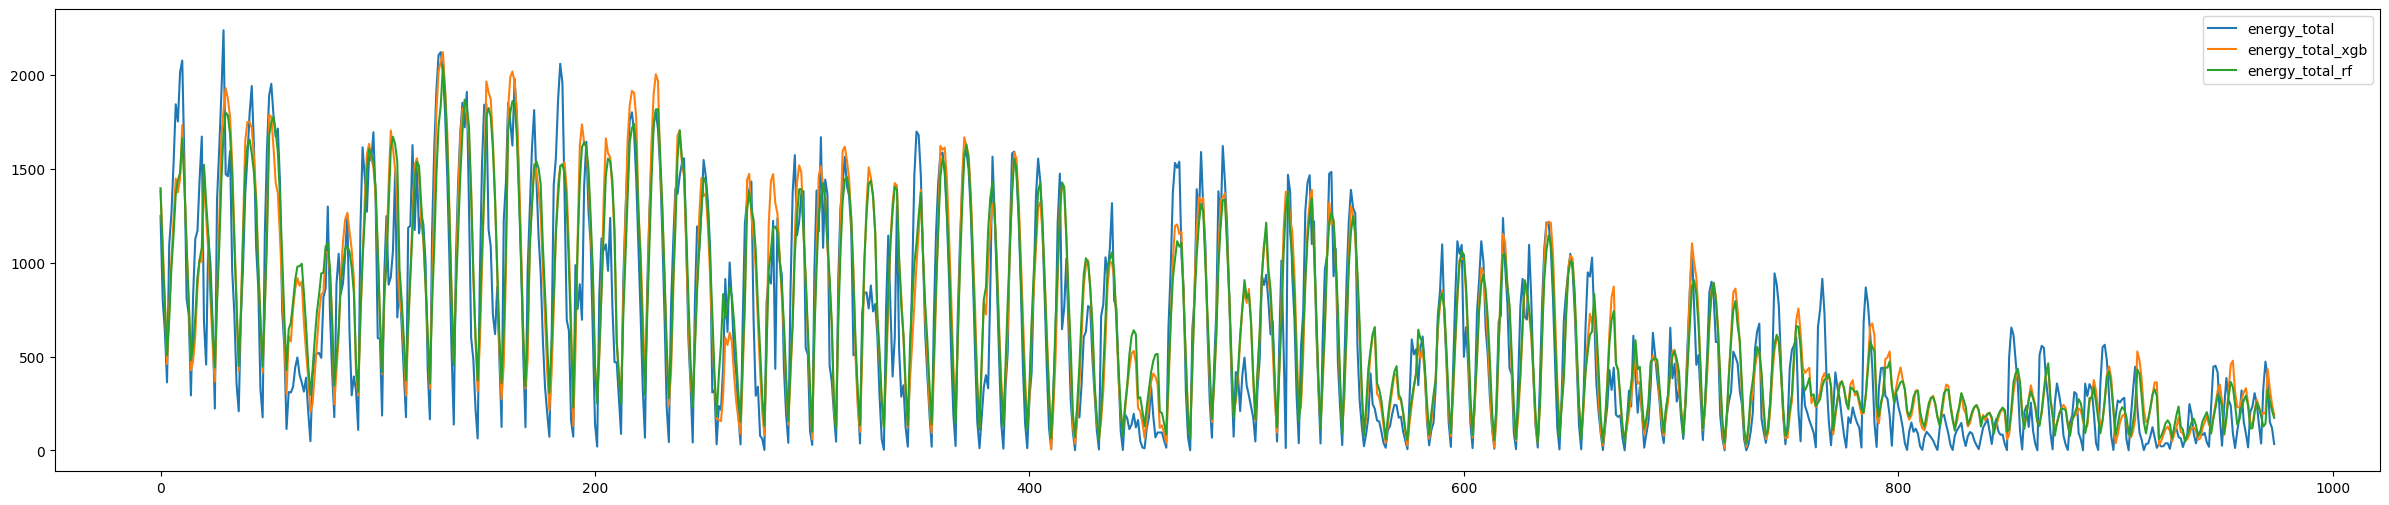

In [23]:
#plot them all in one graph a bit bigger
plt.figure(figsize=(30, 6))
df_test[['energy_total', 'energy_total_xgb', 'energy_total_rf']].plot(figsize=(30, 6))
plt.show()

In [40]:
df_full = pd.read_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/data_final.xlsx')

In [44]:
df_full.head()

,datetime,clouds,dhi,dni,ghi,precip,pres,slp,snow,solar_rad,...,day_cos,hour_sin,hour_cos,sine_elevation,cosine_elevation,sine_azimuth,cosine_azimuth,energy_total_y,energy_total_xgb,energy_total_rf
0,2022-03-25 09:00:00,43,92,773,457,0.0,1026,1029,0.0,434,...,0.124479,-5.877853e-01,0.809017,0.478692,0.877983,0.680721,-0.732543,0.0,0.0,0.0
1,2022-03-25 10:00:00,0,99,813,540,0.0,1026,1029,0.0,540,...,0.124479,-2.449294e-16,1.000000,0.550481,0.834848,0.443071,-0.896486,0.0,0.0,0.0
2,2022-03-25 11:00:00,2,102,830,583,0.0,1026,1029,0.0,583,...,0.124479,5.877853e-01,0.809017,0.586372,0.810042,0.142629,-0.989776,0.0,0.0,0.0
3,2022-03-25 12:00:00,10,102,829,581,0.0,1026,1029,0.0,581,...,0.124479,9.510565e-01,0.309017,0.584958,0.811064,-0.178802,-0.983885,0.0,0.0,0.0
4,2022-03-25 13:00:00,28,99,810,534,0.0,1025,1028,0.0,528,...,0.124479,9.510565e-01,-0.309017,0.544639,0.838671,-0.472551,-0.881303,0.0,0.0,0.0


In [41]:
#merge the two dataframes into one based on datetime merge df_test on df_full but keep all rows in df_full
df_full = pd.merge(df_full, df_test, on='datetime', how='left')

In [42]:
#replace all NaN values with 0
df_full.fillna(0, inplace=True)

In [45]:
#keep only rows energy_total, energy_total_xgb, hour, month
df_full = df_full[['datetime','energy_total_x', 'energy_total_y', 'energy_total_xgb', 'hour', 'month_nr']]

In [46]:
#save the new dataframe to a new excel file called simulation.xlsx
df_full.to_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/simulation.xlsx', index=False)

In [106]:
df_sim = pd.read_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/simulation.xlsx')

In [96]:
df_sim.head(10)

,datetime,energy_total_x,energy_total_y,energy_total_xgb,hour,month_nr,frost_energy,co2,pris
0,2024-08-16 15:00:00,1248.84,1248.84,1383.617920,15.0,8.0,279.62,34.67,616.91
1,2024-08-16 16:00:00,801.32,801.32,1108.773560,16.0,8.0,262.78,32.58,774.29
2,2024-08-16 17:00:00,635.96,635.96,796.293762,17.0,8.0,199.05,24.68,1006.82
3,2024-08-16 18:00:00,362.68,362.68,460.359192,18.0,8.0,257.31,31.91,1720.22
4,2024-08-16 19:00:00,63.44,0.00,0.000000,19.0,8.0,288.66,35.79,1814.25
5,2024-08-16 20:00:00,0.32,0.00,0.000000,20.0,8.0,250.27,31.03,1282.26
6,2024-08-16 21:00:00,0.00,0.00,0.000000,21.0,8.0,204.95,25.41,1003.98
7,2024-08-16 22:00:00,0.00,0.00,0.000000,22.0,8.0,252.40,31.30,866.90
8,2024-08-16 23:00:00,0.00,0.00,0.000000,23.0,8.0,306.86,38.05,799.19
9,2024-08-17 00:00:00,0.00,0.00,0.000000,0.0,8.0,239.28,29.67,815.24


In [107]:
#divide pris with 1000
df_sim['pris'] = df_sim['pris']/1000

In [108]:
#convert all co2 to 0.132
df_sim['co2_factor'] = df_sim['co2'] / df_sim['frost_energy']

In [103]:
df_sim.columns

Index(['datetime', 'energy_total_x', 'energy_total_y', 'energy_total_xgb',
       'hour', 'month_nr', 'frost_energy', 'co2', 'pris', 'co2_factor'],
      dtype='object')

In [138]:
def calculate_energy_conv(row):
    if 0 <= row['hour'] < 7 or 20 < row['hour'] <= 23:
        return row['frost_energy']
    elif 8 <= row['hour'] < 18:
        if row['energy_total_xgb'] > 400 and row['energy_total_x'] > 400:
            return 0
        else:
            if (df_sim.loc[(df_sim['hour'] >= 8) & (df_sim['hour'] < 18), 'energy_total_xgb'] < 400).sum() > 2:
                return row['frost_energy']
            return 0
    elif 18 <= row['hour'] <= 20:
        if (df_sim.loc[(df_sim.index < row.name) & (df_sim.index >= row.name - pd.Timedelta(hours=4)), 'energy_conv'] == 0).all():
            return 0
        return 0
    else:
        return row['frost_energy']

df_sim['energy_conv'] = df_sim.apply(calculate_energy_conv, axis=1)

In [119]:
def calculate_energy_used(row):
    if 0 <= row['hour'] < 8 or 20 < row['hour'] <= 23:
        return row['frost_energy']
    elif 8 <= row['hour'] < 18:
        return 400
    elif 18 <= row['hour'] <= 20:
        if (df_sim.loc[(df_sim['hour'] >= 8) & (df_sim['hour'] < 18), 'energy_conv'] == df_sim.loc[(df_sim['hour'] >= 8) & (df_sim['hour'] < 18), 'frost_energy']).all():
            return row['frost_energy']
        return 0

df_sim['energy_used'] = df_sim.apply(calculate_energy_used, axis=1)

In [143]:
def calculate_temp_sim(row):
    if 0 <= row['hour'] < 8 or 20 < row['hour'] <= 23:
        return -20
    elif 8 <= row['hour'] < 18:
        return max(-25, -20 - (row['hour'] - 8) * 0.4)
    elif 18 <= row['hour'] <= 20:
        return min(-20, -25 + (row['hour'] - 18) * 0.9)
    else:
        return -20
        if (df_sim.loc[(df_sim['hour'] >= 8) & (df_sim['hour'] < 17), 'frost_energy'] == df_sim.loc[(df_sim['hour'] >= 8) & (df_sim['hour'] < 17), 'energy_conv']).all():
            return -20
df_sim['temp_sim'] = df_sim.apply(calculate_temp_sim, axis=1)

In [144]:
df_sim.head(10)

,energy_total_x,energy_total_y,energy_total_xgb,hour,month_nr,frost_energy,co2,pris,co2_factor,energy_conv,energy_used,temp_sim,cost,co2_cost,cost_frost,co2_cost_frost
datetime,,,,,,,,,,,,,,,,
2024-08-16 15:00:00,1248.84,1248.84,1383.617920,15.0,8.0,279.62,34.67,0.61691,0.123990,0.00,400.00,-22.8,0.000000,0.00,172.500374,34.67
2024-08-16 16:00:00,801.32,801.32,1108.773560,16.0,8.0,262.78,32.58,0.77429,0.123982,0.00,400.00,-23.2,0.000000,0.00,203.467926,32.58
2024-08-16 17:00:00,635.96,635.96,796.293762,17.0,8.0,199.05,24.68,1.00682,0.123989,0.00,400.00,-23.6,200.407521,24.68,200.407521,24.68
2024-08-16 18:00:00,362.68,362.68,460.359192,18.0,8.0,257.31,31.91,1.72022,0.124014,0.00,0.00,-25.0,442.629808,31.91,442.629808,31.91
2024-08-16 19:00:00,63.44,0.00,0.000000,19.0,8.0,288.66,35.79,1.81425,0.123987,0.00,0.00,-24.1,523.701405,35.79,523.701405,35.79
2024-08-16 20:00:00,0.32,0.00,0.000000,20.0,8.0,250.27,31.03,1.28226,0.123986,0.00,0.00,-23.2,320.911210,31.03,320.911210,31.03
2024-08-16 21:00:00,0.00,0.00,0.000000,21.0,8.0,204.95,25.41,1.00398,0.123981,204.95,204.95,-20.0,205.765701,25.41,205.765701,25.41
2024-08-16 22:00:00,0.00,0.00,0.000000,22.0,8.0,252.40,31.30,0.86690,0.124010,252.40,252.40,-20.0,218.805560,31.30,218.805560,31.30
2024-08-16 23:00:00,0.00,0.00,0.000000,23.0,8.0,306.86,38.05,0.79919,0.123998,306.86,306.86,-20.0,245.239443,38.05,245.239443,38.05


In [112]:
#make datetime the index
df_sim.set_index('datetime', inplace=True)

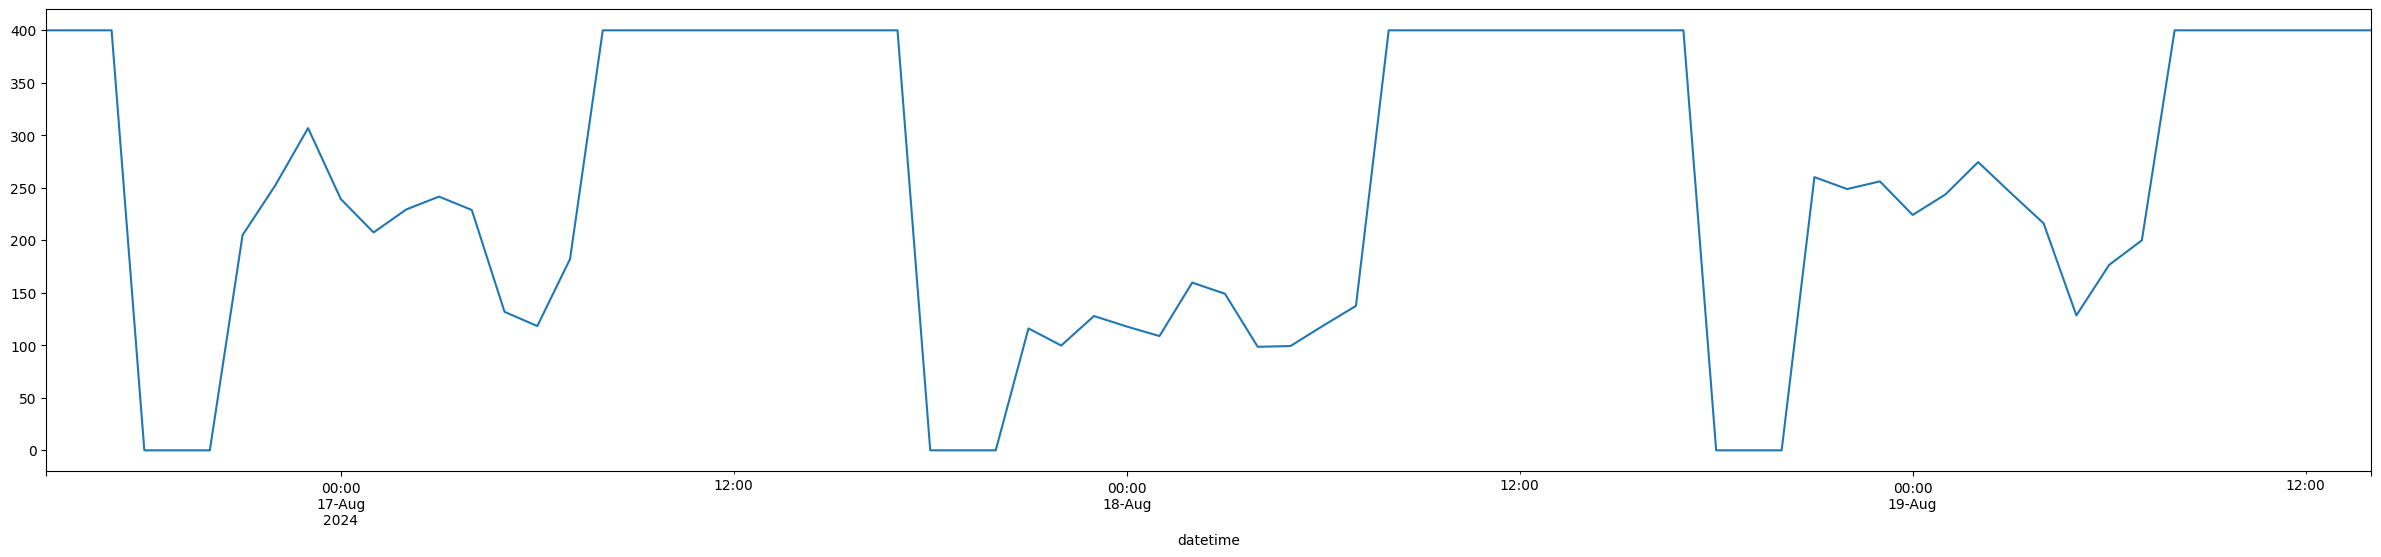

In [130]:
# Plot energy_used for three days
#df_sim['energy_used'].iloc[:72].plot(figsize=(30, 6))
df_sim['energy_used'].iloc[:72].plot(x='hour', figsize=(30, 6))
plt.show()

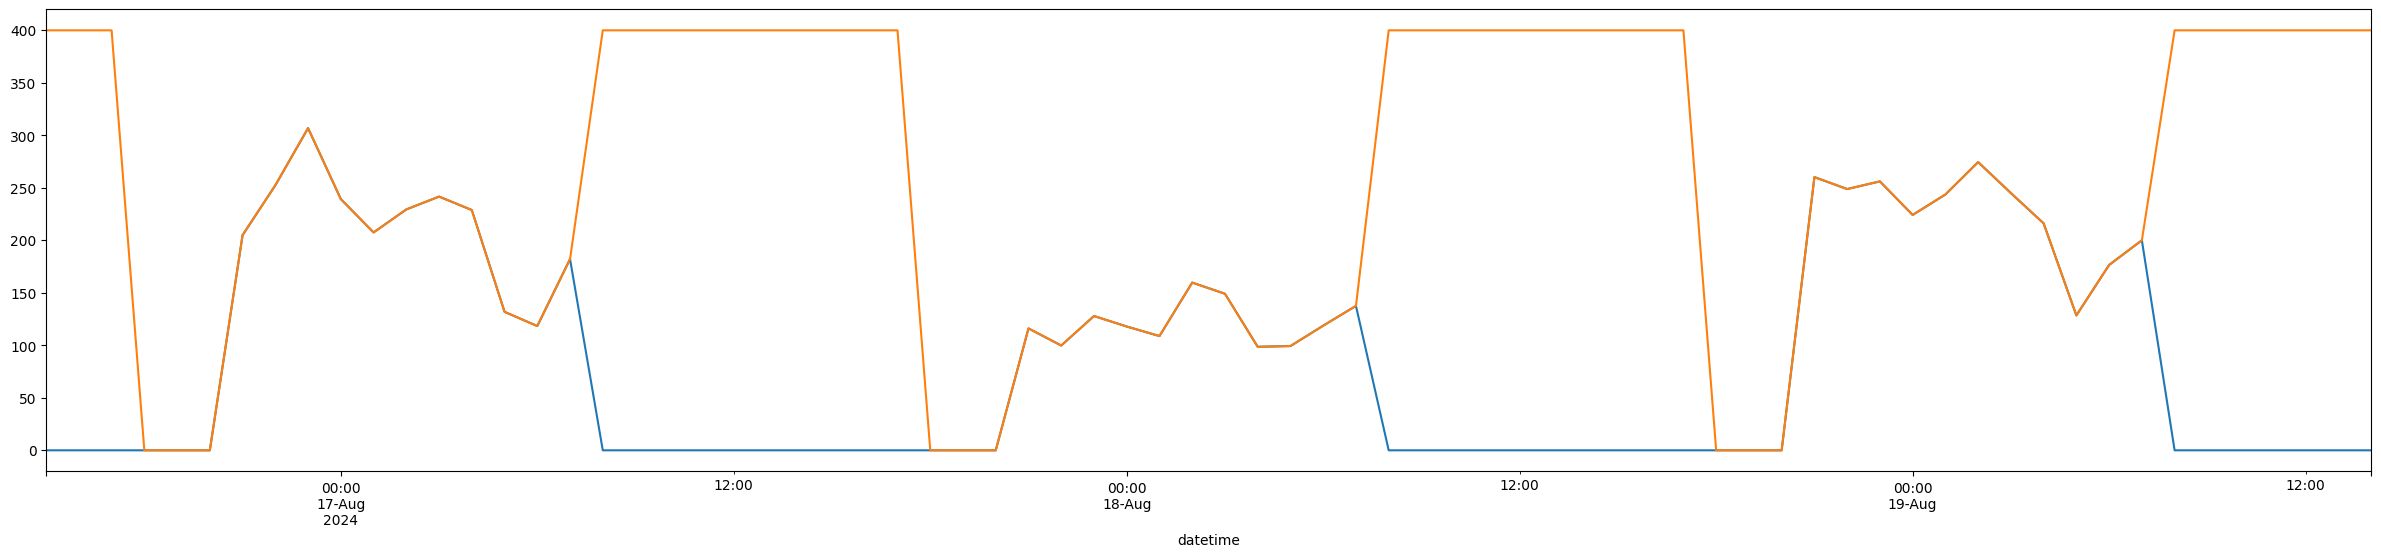

In [140]:
# Plot energy_used for three days
df_sim['energy_conv'].iloc[:72].plot(figsize=(30, 6))
df_sim['energy_used'].iloc[:72].plot(figsize=(30, 6))
plt.show()

In [145]:
#calculate the cost of the energy and the co2 from energy_conv
df_sim['cost'] = df_sim['energy_conv'] * df_sim['pris']
df_sim['co2_cost'] = df_sim['energy_conv'] * df_sim['co2_factor']

In [146]:
#sum them up
total_cost = df_sim['cost'].sum()
total_co2 = df_sim['co2_cost'].sum()
print('Total cost: ', total_cost)
print('Total co2: ', total_co2)

Total cost:  251705.3559748
Total co2:  47197.34


In [147]:
#calculate the cost of energy_frost and the price and the co2 from energy_frost
df_sim['cost_frost'] = df_sim['frost_energy'] * df_sim['pris']
df_sim['co2_cost_frost'] = df_sim['frost_energy'] * df_sim['co2_factor']

#sum them up
total_cost_frost = df_sim['cost_frost'].sum()
total_co2_frost = df_sim['co2_cost_frost'].sum()
print('Total cost frost: ', total_cost_frost)
print('Total co2 frost: ', total_co2_frost)

Total cost frost:  338224.31973
Total co2 frost:  67052.48000000001


In [148]:
#calculate the percentage of the cost and co2 saved
cost_saved = (total_cost_frost - total_cost) / total_cost_frost * 100
co2_saved = (total_co2_frost - total_co2) / total_co2_frost * 100
print('Cost saved: ', cost_saved)
print('Co2 saved: ', co2_saved)

Cost saved:  25.580349699355427
Co2 saved:  29.6113432344337


In [149]:
#save it to a new excel file called simulation_final.xlsx
df_sim.to_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/simulation_final.xlsx')